In [58]:
home_dir = ''   # specify where folder 'data_SolarAtmosphere' is relative to this jupyter notebook


import numpy as np
import constants as const
import scipy.interpolate
import scipy.misc

##################
import timeit
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import matplotlib.ticker as ticker
rc('text',usetex=True)  # Make use of TeX\ufeff
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rcParams['figure.figsize'] = 6, 6
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1.4
rcParams['xtick.minor.size'] = 6
rcParams['xtick.minor.width'] = 1.2
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1.4
rcParams['ytick.minor.size'] = 6
rcParams['ytick.minor.width'] = 1.2
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.major.pad']='6'
rcParams['xtick.major.pad']='6'

In [2]:
data_original = np.loadtxt(home_dir+'data_Avrett08_ModelC/Avrett08_ModelC_original.txt')

f = open(home_dir+'data_Avrett08_ModelC/Avrett08_ModelC.txt', 'w')
f.write('# Atmospheric Parameters for Model C7\n')
f.write('# Eugene H. Avrett and Rudolf Loeser ApJS 175 229 (2008)\n')
f.write('# DOI: 10.1086/523671\n')
f.write('# \n')
f.write('# \n')
f.write('# 0: h[cm], height from z=0km\n')
f.write('# 1: m[g/cm^2], column mass = P_tot/g_acc\n')
f.write('# 2: T[K], temperature\n')
f.write('# 3: P_gas[dyn/cm^2], gas pressure\n')
f.write('# 4: P_tot[dyn/cm^2], total pressure = P_gas + P_turbulence\n')
f.write('# 5: nH_tot[1/cm^3], total hydrogen density\n')
f.write('# \n')
f.write('# \n')
f.write('# h[cm], m[g/cm^2], T[k], P_gas[dyn/cm^2], P_tot[dyn/cm^2], nH_tot[1/cm^3]\n')
for i in range(data_original.shape[1]):
    f.write('%.5e '%(data_original[0][i] * 1e5))   # convert unit from km to cm
    f.write('%.3e '%data_original[1][i])  
    f.write('%.3e '%data_original[2][i]) 
    f.write('%.3e '%data_original[3][i]) 
    f.write('%.3e '%data_original[4][i])  
    f.write('%.3e\n'%data_original[5][i])    
f.close()

In [3]:
data = np.loadtxt(home_dir+'data_Avrett08_ModelC/Avrett08_ModelC.txt')

Pgas_intp = scipy.interpolate.interp1d(data[:,0], data[:,3], kind='cubic')
Ptot_intp = scipy.interpolate.interp1d(data[:,0], data[:,4], kind='cubic')
nH_intp = scipy.interpolate.interp1d(data[:,0], data[:,5], kind='cubic')
m_intp = scipy.interpolate.interp1d(data[:,0], data[:,1], kind='cubic')

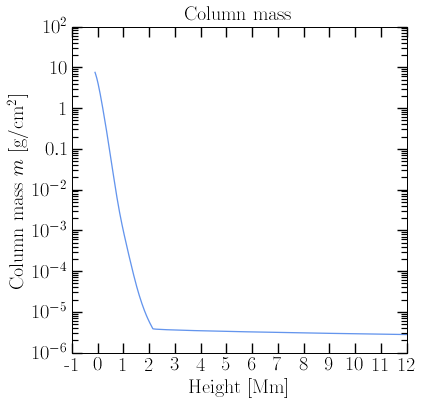

In [4]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data[:,0]/1e8, data[:,1], color='cornflowerblue', linewidth=1.3)
ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'Column mass $m$~[${\rm g/cm^2}$]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1e-6, 1e2)

ax2.set_yscale('log')
ax2.set_ylim(1e-6, 1e2)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)


x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_expidx = np.arange(-6, 2+1, 1)
y_ticks = np.power(10.0, (y_expidx))
y_labels = [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$0.1$', r'$1$', r'$10$', r'$10^2$']
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Column mass', fontsize=20)
plt.savefig(home_dir+'data_Avrett08_ModelC/plots/column_mass.pdf', bbox_inches='tight')
plt.show()
plt.close()

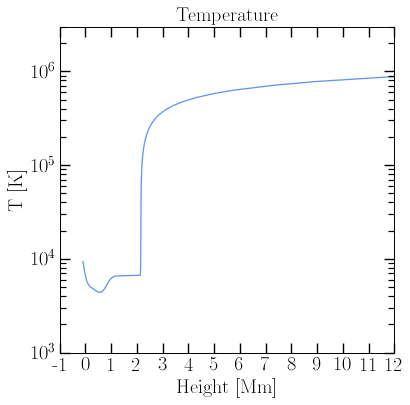

In [5]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data[:,0]/1e8, data[:,2], color='cornflowerblue', linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'T~[K]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1e3, 3e6)

ax2.set_yscale('log')
ax2.set_ylim(1e3, 3e6)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)

x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_ticks = np.array([1e3, 1e4, 1e5, 1e6])
y_labels = [r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$']
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Temperature', fontsize=20)
plt.savefig(home_dir+'data_Avrett08_ModelC/plots/T.pdf', bbox_inches='tight')
plt.show()
plt.close()

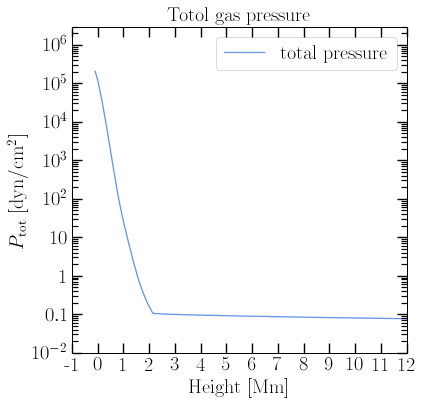

In [6]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data[:,0]/1e8, data[:,4], color='cornflowerblue', linewidth=1.3, label=r'total pressure')

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$P_{\rm tot}$~[${\rm dyn/cm^2}$]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1e-2, 3e6)

ax2.set_yscale('log')
ax2.set_ylim(1e-2, 3e6)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)

x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_expidx = np.arange(-2, 6+1, 1)
y_ticks = np.power(10.0, (y_expidx))
y_labels = [r'$10^{-2}$', r'$0.1$', r'$1$', r'$10$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$']
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

ax1.legend(loc='upper right', fontsize=20, framealpha=0.7)

plt.title(r'Totol gas pressure', fontsize=20)
plt.savefig(home_dir+'data_Avrett08_ModelC/plots/P_tot.pdf', bbox_inches='tight')
plt.show()
plt.close()

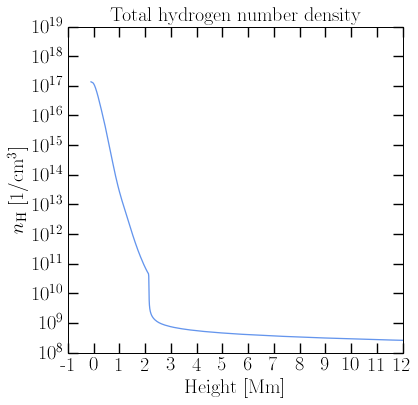

In [7]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data[:,0]/1e8, data[:,5], color='cornflowerblue', linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$n_{\rm H}$~[${\rm 1/cm^3}$]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1e8, 1e19)

ax2.set_yscale('log')
ax2.set_ylim(1e8, 1e19)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)


x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_expidx = np.arange(8, 19+1, 1)
y_ticks = np.power(10.0, (y_expidx))
y_labels = [r'$10^{%i}$'%i for i in y_expidx]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Total hydrogen number density', fontsize=20)
plt.savefig(home_dir+'data_Avrett08_ModelC/plots/n_H.pdf', bbox_inches='tight')
plt.show()
plt.close()

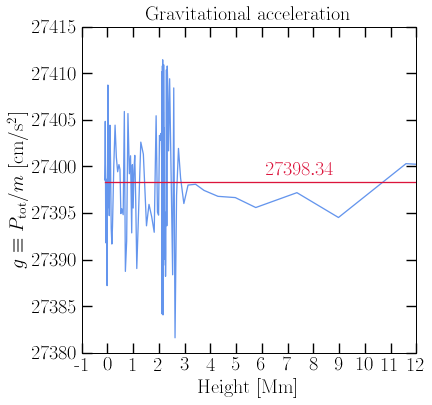

In [8]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data[:,0]/1e8, data[:,4]/data[:,1], color='cornflowerblue', linewidth=1.3)
mean = np.average(data[:,4]/data[:,1])
ax1.plot([-0.1, 12], [mean]*2, color='crimson', linewidth=1.3)
ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$g \equiv P_{\rm tot}/m$~[${\rm cm/s^2}$]', fontsize=20)

ax1.set_xscale('linear')
ax2.set_xscale('linear')
ax1.set_yscale('linear')
ax3.set_yscale('linear')
ax1.set_xlim(-1, 12)
ax3.set_xlim(-1, 12)
ax1.set_ylim(27380, 27415)
ax2.set_ylim(27380, 27415)

x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_ticks = np.arange(27380, 27415+5, 5)
y_labels = [r'$%i$'%i for i in y_ticks]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

ax1.text(0.55, 0.56, r'$%.2f$'%(mean), fontsize=20, color='crimson', ha='left', va='center', transform=ax1.transAxes)

plt.title(r'Gravitational acceleration', fontsize=20)
plt.savefig(home_dir+'data_Avrett08_ModelC/plots/g_acc.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [9]:
def dPtot_dz_intp(z, dx):
    return scipy.misc.derivative(Ptot_intp, z, dx=dx)

def rho_intp(z, dx):    
    rho = -1 * m_intp(z) / Ptot_intp(z) * dPtot_dz_intp(z, dx)
    return abs(rho)

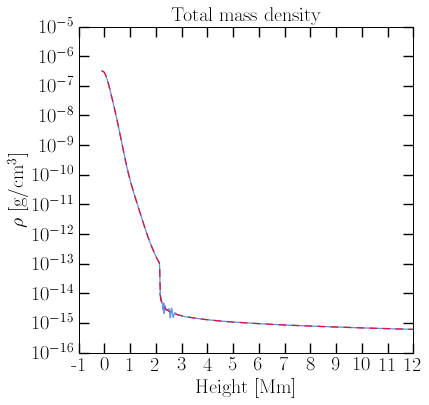

In [10]:
z_arr = np.linspace(-99.99e5, 12000e5, 50000)

z_left = 2.05e8; z_right = 2.35e8
idx_left = np.where(z_arr<z_left)[0]
idx_middle = np.where((z_arr>z_left) & (z_arr<z_right))[0]
idx_right = np.where(z_arr>z_right)[0]

rho_left = rho_intp(z_arr[idx_left], dx=1e1)
rho_middle = rho_intp(z_arr[idx_middle], dx=10e5)
rho_right = rho_intp(z_arr[idx_right], dx=1e1)
rho_arr = np.concatenate((rho_left, rho_middle, rho_right), axis=0)

#####
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(z_arr/1e8, rho_arr, color='cornflowerblue', linewidth=1.3)
ax1.plot(z_arr/1e8, nH_intp(z_arr) * const.m_H / 0.7140612725844463 , color='crimson', dashes=[6,4], linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$\rho$~[${\rm g/cm^3}$]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1e-16, 1e-5)

ax2.set_yscale('log')
ax2.set_ylim(1e-16, 1e-5)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)

x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_expidx = np.arange(-16, -5+1, 1)
y_ticks = np.power(10.0, (y_expidx))
y_labels = [r'$10^{%i}$'%i for i in y_expidx]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Total mass density', fontsize=20)
plt.savefig(home_dir+'data_Avrett08_ModelC/plots/rho.pdf', bbox_inches='tight')
plt.show()
plt.close()

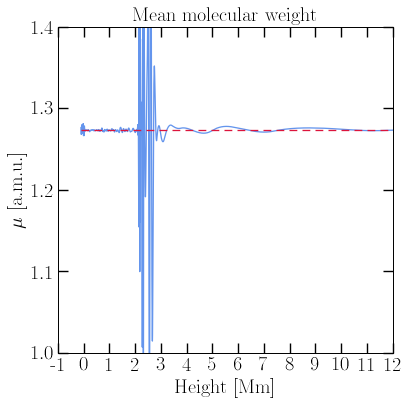

In [11]:
z_arr = np.linspace(-99.999e5, 12000e5, 50000)

#####
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

const.A_H = 1.; const.A_He = 4.;
XH_arr = nH_intp(z_arr) * const.m_H / rho_arr
mu_arr = 1./(XH_arr * (1./const.A_H - 1./const.A_He) + 1./const.A_He)
ax1.plot(z_arr/1e8, mu_arr, color='cornflowerblue', linewidth=1.3)

# z2 = np.linspace(-1000e5, -1e+07, 100)
# ax1.plot(z2/1e8, PM.MU_as_z(z2), color='black', linewidth=1.3)

ax1.plot([-0.1, 12], [1.273, 1.273], color='crimson', dashes=[6,4], linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$\mu$~[a.m.u.]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1, 1.4)

ax2.set_yscale('linear')
ax2.set_ylim(1, 1.4)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)

x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_ticks = np.arange(1, 1.4+0.1, 0.1)
y_labels = [r'%.1f'%i for i in y_ticks]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Mean molecular weight', fontsize=20)
plt.savefig(home_dir+'data_Avrett08_ModelC/plots/XH.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Combine Model-C and HSRASP
#### Below z=-100km, I use HSRASP; Above -100km, I use Model C

In [12]:
data_atmosphere = np.loadtxt(home_dir+'data_Avrett08_ModelC/Avrett08_ModelC.txt')
data_convection = np.loadtxt(home_dir+'data_HSRASP.txt')

z_min_Avrett08_ModelC = min(data_atmosphere[:,0])

idx_arr_cvn = np.where( data_convection[:,0] < z_min_Avrett08_ModelC )[0]
height_arr_all = np.concatenate((data_atmosphere[:,0], data_convection[:,0][idx_arr_cvn]), axis=0)
T_arr_all = np.concatenate((data_atmosphere[:,2], data_convection[:,2][idx_arr_cvn]), axis=0)
P_gas_arr_all = np.concatenate((data_atmosphere[:,3], data_convection[:,1][idx_arr_cvn]), axis=0)
mu_arr_all = np.concatenate(([1.273]*len(data_atmosphere[:,0]), data_convection[:,4][idx_arr_cvn]), axis=0)

XH_cvn = (data_convection[:,4][idx_arr_cvn]**(-1) - const.A_He**(-1)) / (const.A_H**(-1) - const.A_He**(-1))
nH_cvn = XH_cvn * data_convection[:,3][idx_arr_cvn] / const.m_H
nH_arr_all = np.concatenate((data_atmosphere[:,5], nH_cvn), axis=0)

XH_arr = (mu_arr_all**(-1) - const.A_He**(-1)) / (const.A_H**(-1) - const.A_He**(-1))
rho_tot_arr = nH_arr_all * const.m_H / XH_arr

In [13]:
f = open(home_dir+'solar_atmosphere_profile.txt', 'w')
f.write('# Atmospheric Parameters, from z=%iMm to z=%iMm\n'%(height_arr_all[-1]/1e8, height_arr_all[0]/1e8))
f.write('#\n')
f.write('# Below z=-100km, HSRASP\n')
f.write('# Above z=-100km, Model C7 from Avrett and Loeser 2008\n')
f.write('# HSRASP: Chapman ApJ 232 923 (1979)\n')
f.write('# DOI: 10.1086/157355\n')
f.write('# Model C7: Eugene H. Avrett and Rudolf Loeser ApJS 175 229 (2008)\n')
f.write('# DOI: 10.1086/523671\n')
f.write('#\n')
f.write('# 0: z[km] height from z=0km, where z=0km is where tau_5000=1\n')
f.write('# 1: T[K]\n')
f.write('# 2: P_gas[dyn/cm^2] gas pressure\n')
f.write('# 3: rho_tot[g/cm^3] total mass density\n')
f.write('# 4: nH[1/cm^3] total hydrogen number density\n')
f.write('# 5: mu[a.m.u.] mean molecular weight\n')
f.write('# 6: X_H Hydrogen mass fraction\n')
f.write('#\n')
f.write('# z, T, P_gas, rho_tot, nH, mu, X_H\n')
for i in range(len(height_arr_all)):
    f.write('%.5e '%(height_arr_all[i]))
    f.write('%.5e '%(T_arr_all[i]))
    f.write('%.5e '%(P_gas_arr_all[i]))
    f.write('%.5e '%(rho_tot_arr[i]))
    f.write('%.5e '%(nH_arr_all[i]))
    f.write('%.5e '%(mu_arr_all[i]))
    f.write('%.5e\n'%(XH_arr[i]))
f.close()

# Plot new results, as sanity check

In [14]:
data_atmospheric = np.loadtxt(home_dir+'solar_atmosphere_profile.txt')

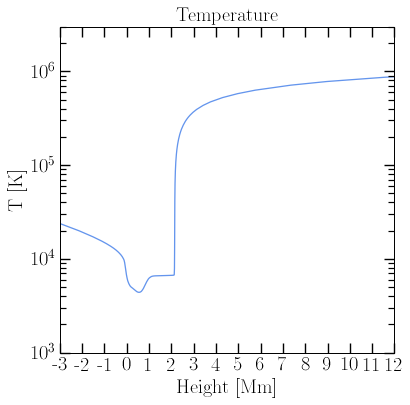

In [18]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data_atmospheric[:,0]/1e8, data_atmospheric[:,1], color='cornflowerblue', linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'T~[K]', fontsize=20)

ax1.set_xscale('linear')
ax3.set_xscale('linear')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(-3, 12)
ax3.set_xlim(-3, 12)
ax1.set_ylim(1e3, 3e6)
ax2.set_ylim(1e3, 3e6)

x_ticks = np.arange(-3, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_ticks = np.array([1e3, 1e4, 1e5, 1e6])
y_labels = [r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$']
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Temperature', fontsize=20)
plt.savefig(home_dir+'plots_atmosphere_profile/T.pdf', bbox_inches='tight')
plt.show()
plt.close()

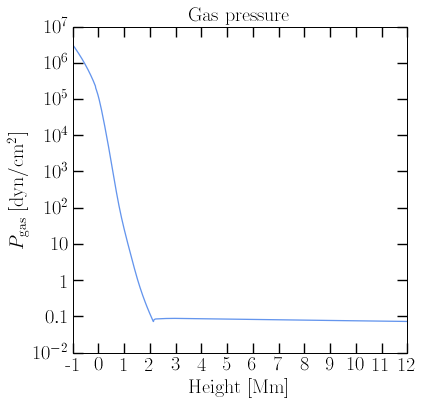

In [48]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data_atmospheric[:,0]/1e8, data_atmospheric[:,2], color='cornflowerblue', linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$P_{\rm gas}$~[${\rm dyn/cm^2}$]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1e-2, 1e7)

ax2.set_yscale('log')
ax2.set_ylim(1e-2, 1e7)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)


x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_expidx = np.arange(-2, 7+1, 1)
y_ticks = np.power(10.0, (y_expidx))
y_labels = [r'$10^{-2}$', r'$0.1$', r'$1$', r'$10$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$']
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)


plt.title(r'Gas pressure', fontsize=20)
plt.savefig(home_dir+'plots_atmosphere_profile/P_gas.pdf', bbox_inches='tight')
plt.show()
plt.close()

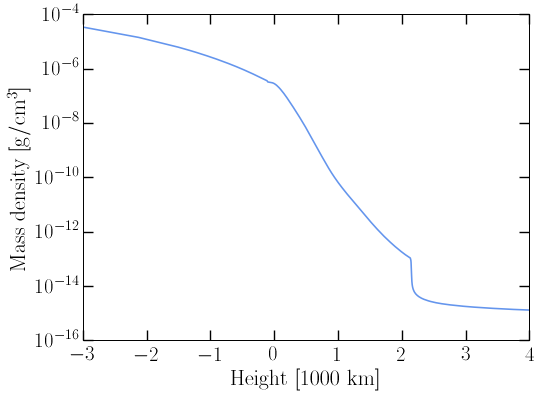

In [64]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data_atmospheric[:,0]/1e8, data_atmospheric[:,3], color='cornflowerblue', linewidth=1.6)

ax1.set_xlabel(r'Height~[1000~km]', fontsize=22)
ax1.set_ylabel(r'Mass density~[${\rm g/cm^3}$]', fontsize=22)

ax1.set_xscale('linear')
ax3.set_xscale('linear')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(-3, 4)
ax3.set_xlim(-3, 4)
ax1.set_ylim(1e-16, 1e-4)
ax2.set_ylim(1e-16, 1e-4)

x_ticks = np.arange(-3, 4+0.01, 1)
x_labels = [r'$%i$'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=21)
ax3.set_xticks(x_ticks, [], fontsize=21)

y_expidx = np.arange(-16, -4+1, 2)
y_ticks = np.power(10.0, (y_expidx))
y_labels = [r'$10^{%i}$'%i for i in y_expidx]
ax1.set_yticks(y_ticks, y_labels, fontsize=21)
ax2.set_yticks(y_ticks, [], fontsize=20)

# plt.title(r'Total mass density', fontsize=20)
plt.savefig(home_dir+'plots_atmosphere_profile/rho_tot.pdf', bbox_inches='tight')
plt.show()
plt.close()

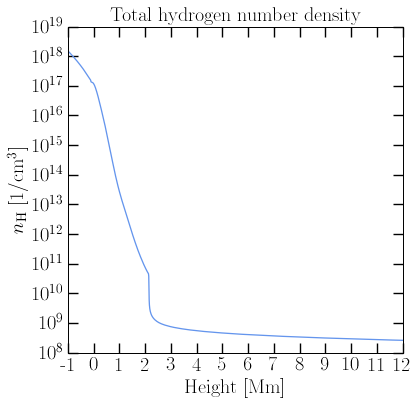

In [50]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data_atmospheric[:,0]/1e8, data_atmospheric[:,4], color='cornflowerblue', linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$n_{\rm H}$~[${\rm 1/cm^3}$]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1e8, 1e19)

ax2.set_yscale('log')
ax2.set_ylim(1e8, 1e19)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)


x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_expidx = np.arange(8, 19+1, 1)
y_ticks = np.power(10.0, (y_expidx))
y_labels = [r'$10^{%i}$'%i for i in y_expidx]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Total hydrogen number density', fontsize=20)
plt.savefig(home_dir+'plots_atmosphere_profile/n_H.pdf', bbox_inches='tight')
plt.show()
plt.close()

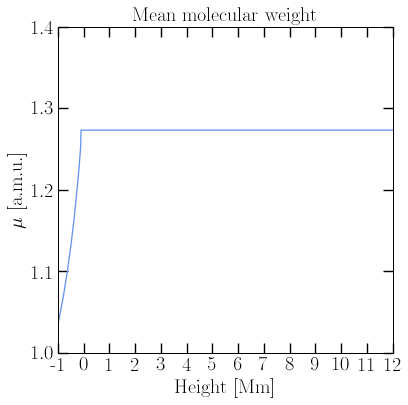

In [51]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data_atmospheric[:,0]/1e8, data_atmospheric[:,5], color='cornflowerblue', linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$\mu$~[a.m.u.]', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlim(-1, 12)
ax1.set_ylim(1, 1.4)

ax2.set_yscale('linear')
ax2.set_ylim(1, 1.4)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)

x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_ticks = np.arange(1, 1.4+0.1, 0.1)
y_labels = [r'%.1f'%i for i in y_ticks]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Mean molecular weight', fontsize=20)
plt.savefig(home_dir+'plots_atmosphere_profile/mu.pdf', bbox_inches='tight')
plt.show()
plt.close()

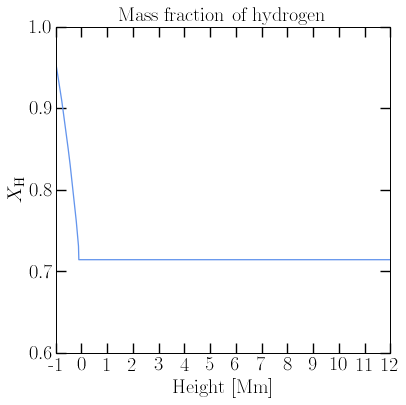

In [52]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

ax1.plot(data_atmospheric[:,0]/1e8, data_atmospheric[:,6], color='cornflowerblue', linewidth=1.3)

ax1.set_xlabel(r'Height~[Mm]', fontsize=20)
ax1.set_ylabel(r'$X_{\rm H}$', fontsize=20)

ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlim(-1, 12)
ax1.set_ylim(0.6, 1)

ax2.set_yscale('linear')
ax2.set_ylim(0.6, 1)

ax3.set_xscale('linear')
ax3.set_xlim(-1, 12)

x_ticks = np.arange(-1, 12+1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_ticks = np.arange(0.6, 1+0.001, 0.1)
y_labels = [r'%.1f'%i for i in y_ticks]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

plt.title(r'Mass fraction of hydrogen', fontsize=20)
plt.savefig(home_dir+'plots_atmosphere_profile/XH.pdf', bbox_inches='tight')
plt.show()
plt.close()